In [1]:
%matplotlib inline
import numpy as np
from matplotlib_params_file import *

In [2]:
# Load the dictionary from the .npz file
L_GRF = 1380.0
N_GRF=512
Nskew = 9797
num_sim=20
Nl = 500
data = np.load(f'./data/Cell_GRF_L{int(L_GRF):d}_N{int(N_GRF):d}_Nq{int(Nskew):d}_Nl{int(Nl):d}_sims{int(num_sim):d}.npz')

In [3]:
# Extract binned_ells and theory_cl
binned_ells = data['binned_ells']
theory_cl = data['window_conv_theory_cl']
measured_cl = data['cl_k']
measured_wl = data['wl_k']
binned_cl = data['measured_cl']

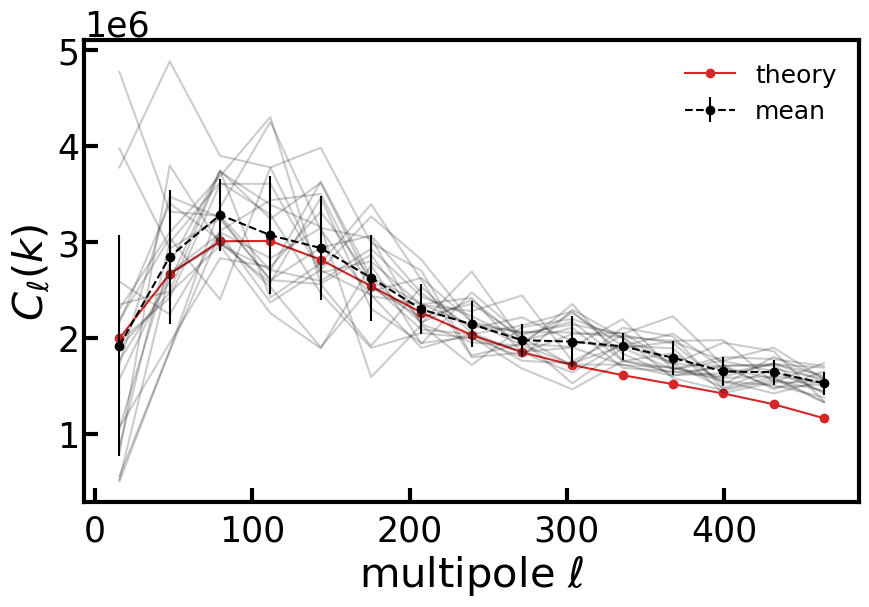

In [13]:
# Plot binned_ells vs theory_cl
plt.figure(figsize=(10, 6))
plt.plot(binned_ells, theory_cl/N_GRF**2/L_GRF**2/(4*np.pi)**2/60, marker='o', linestyle='-', color='C3', label='theory')
for i in range(num_sim):
    plt.plot(binned_ells, binned_cl[i], 'k-', alpha=0.2)
mean_binned_cl = np.mean(binned_cl, axis=0)
std_binned_cl = np.std(binned_cl, axis=0)
plt.errorbar(binned_ells, mean_binned_cl,yerr=std_binned_cl, marker='o', linestyle='--', color='k', label='mean')
plt.xlabel(r'multipole $\ell$')
plt.ylabel(r'$C_{\ell}(k)$')
plt.legend(ncol=1, fontsize=18, loc='upper right')
plt.show()